# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




## I. Основные характеристики

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загрузка данных
df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')

# Укажите свой номер N
N = 6  # пример! замените на ваш номер
col = df.columns[N % 7]
data = df[col].dropna()

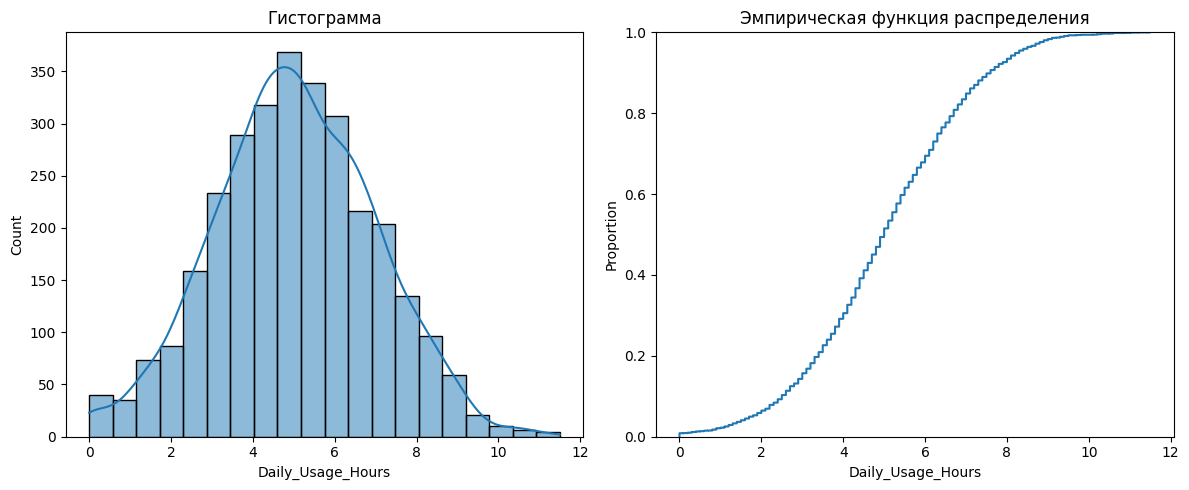

In [45]:
# Расчет характеристик
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data, kde=True, bins=20)
plt.title('Гистограмма')

plt.subplot(1,2,2)
sns.ecdfplot(data)
plt.title('Эмпирическая функция распределения')
plt.tight_layout()
plt.show()

In [46]:
# Гистограмма и Эмпирическая функция распределения
mean = data.mean()
var = data.var(ddof=1)
mode = data.mode().iloc[0]
median = data.median()
quantiles = data.quantile([0.25, 0.5, 0.75])
kurt = data.kurtosis()
skew = data.skew()
IQR = quantiles[0.75] - quantiles[0.25]

print(f"Среднее: {mean:.3f}")
print(f"Дисперсия: {var:.3f}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили: {quantiles}")
print(f"Эксцесс: {kurt:.3f}")
print(f"Ассиметрия: {skew:.3f}")
print(f"Интерквартильный размах: {IQR:.3f}")

Среднее: 5.021
Дисперсия: 3.828
Мода: 4.4
Медиана: 5.0
Квантили: 0.25    3.7
0.50    5.0
0.75    6.4
Name: Daily_Usage_Hours, dtype: float64
Эксцесс: -0.121
Ассиметрия: 0.016
Интерквартильный размах: 2.700


## II. Проверка на нормальность

In [47]:
# Хи-квадрат
# Разбиение на интервалы (например, 8)
bins = np.histogram_bin_edges(data, bins=8)
freq, _ = np.histogram(data, bins)

# Ожидаемые частоты (при нормальном)
cdf = stats.norm.cdf(bins, loc=mean, scale=np.sqrt(var))
exp_freq = len(data) * np.diff(cdf)

chi2 = ((freq - exp_freq) ** 2 / exp_freq).sum()
df_ = len(freq) - 1 - 2  # -2: оценка среднего и дисперсии
print(f"Хи-квадрат: {chi2:.3f}, Степеней свободы: {df_}")

Хи-квадрат: 13.870, Степеней свободы: 5


In [48]:
# Критерии асимметрии и эксцесса
n = len(data)
z_skew = skew / np.sqrt(6/n)
z_kurt = kurt / np.sqrt(24/n)
print(f'Z-асимметрия: {z_skew:.3f}, Z-эксцесс: {z_kurt:.3f}')

Z-асимметрия: 0.362, Z-эксцесс: -1.351


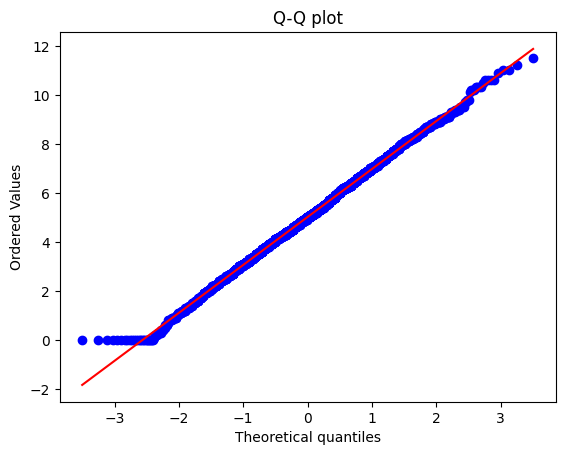

In [49]:
# Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

## III. Преобразование данных

In [50]:
# Удаление выбросов
# Метод 1: Усечение по 1.5*IQR
q1, q3 = quantiles[0.25], quantiles[0.75]
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
data_cut = data[(data >= lower) & (data <= upper)]

In [51]:
# Стандартизация
data_std = (data_cut - data_cut.mean()) / data_cut.std()

In [52]:
# Логарифмирование
if (data_cut > 0).all():
    data_log = np.log(data_cut)
else:
    data_log = data_cut  # если нет, оставить как есть

### Пункты I и II для обработанных данных


=== Стандартизированные данные ===
Среднее: -0.000
Дисперсия: 1.000
Мода: -0.3114283294565923
Медиана: -0.0006063973035317901
Квантили: [-6.74053917e-01 -6.06397304e-04  6.72841122e-01]
Эксцесс: -0.237
Ассиметрия: -0.046
Интерквартильный размах: 1.347


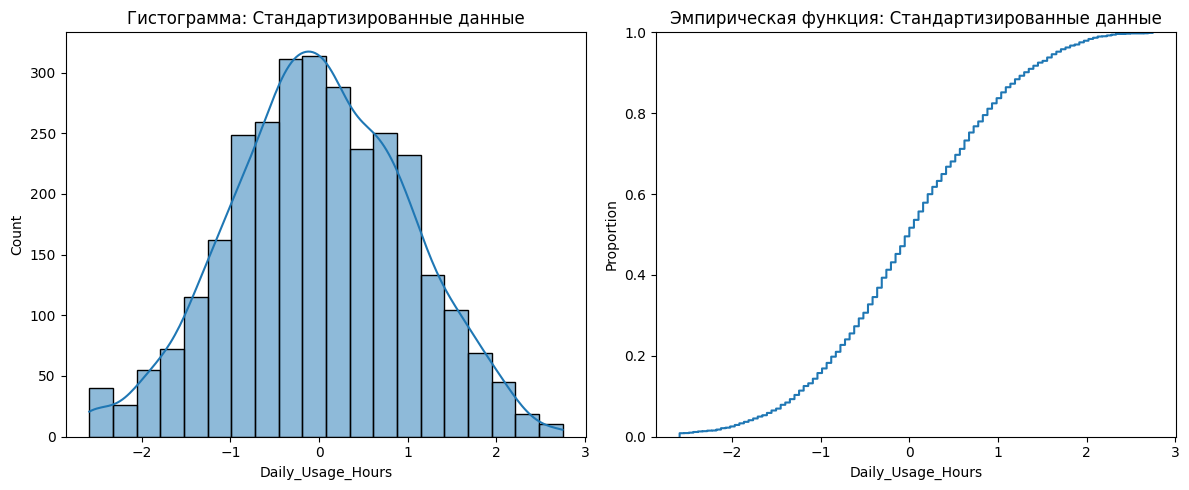

Хи-квадрат: 13.377, Степеней свободы: 5
Z-асимметрия: -1.021, Z-эксцесс: -2.651


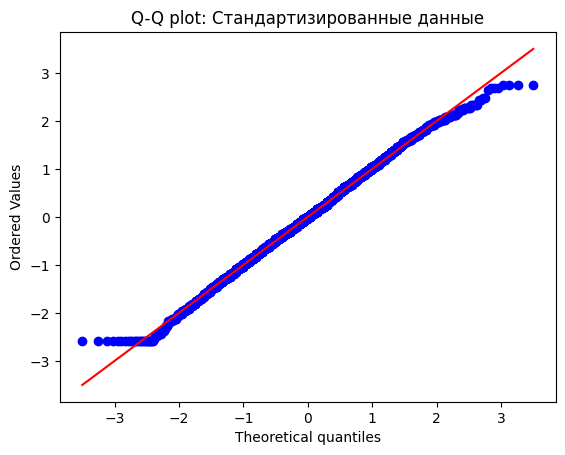


=== Логарифмированные данные ===
Среднее: 5.001
Дисперсия: 3.726
Мода: 4.4
Медиана: 5.0
Квантили: [3.7 5.  6.3]
Эксцесс: -0.237
Ассиметрия: -0.046
Интерквартильный размах: 2.600


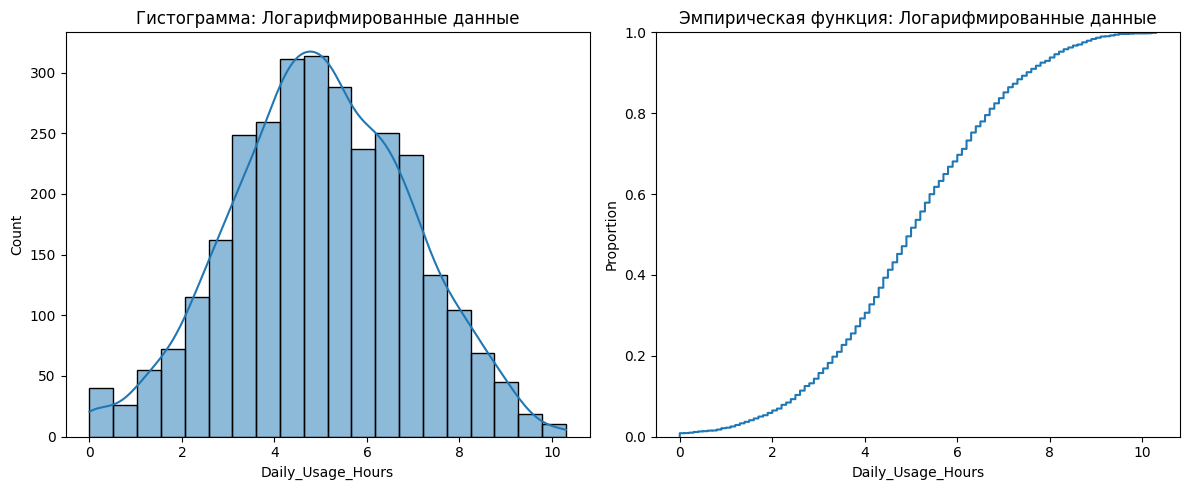

Хи-квадрат: 13.377, Степеней свободы: 5
Z-асимметрия: -1.021, Z-эксцесс: -2.651


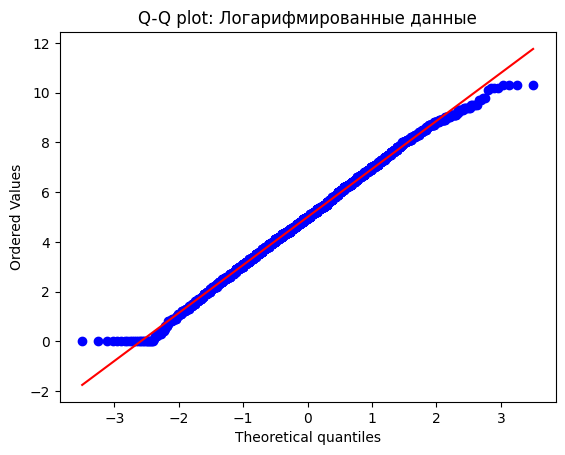

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_data(data, title="Данные"):
    data = data.dropna()  # На всякий случай уберём пропуски

    print(f'\n=== {title} ===')
    mean = data.mean()
    var = data.var(ddof=1)
    mode = data.mode().iloc[0] if not data.mode().empty else np.nan
    median = data.median()
    quantiles = data.quantile([0.25, 0.5, 0.75])
    kurt = data.kurtosis()
    skew = data.skew()
    IQR = quantiles[0.75] - quantiles[0.25]

    print(f"Среднее: {mean:.3f}")
    print(f"Дисперсия: {var:.3f}")
    print(f"Мода: {mode}")
    print(f"Медиана: {median}")
    print(f"Квантили: {quantiles.values}")
    print(f"Эксцесс: {kurt:.3f}")
    print(f"Ассиметрия: {skew:.3f}")
    print(f"Интерквартильный размах: {IQR:.3f}")

    # Гистограмма и ЭФР
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(data, kde=True, bins=20)
    plt.title(f'Гистограмма: {title}')

    plt.subplot(1,2,2)
    sns.ecdfplot(data)
    plt.title(f'Эмпирическая функция: {title}')
    plt.tight_layout()
    plt.show()

    # Хи-квадрат вручную
    bins = np.histogram_bin_edges(data, bins=8)
    freq, _ = np.histogram(data, bins)
    cdf = stats.norm.cdf(bins, loc=mean, scale=np.sqrt(var))
    exp_freq = len(data) * np.diff(cdf)
    # Исключаем нулевые ожидаемые частоты (иначе деление на ноль)
    valid = exp_freq > 0
    chi2 = ((freq[valid] - exp_freq[valid]) ** 2 / exp_freq[valid]).sum()
    df_ = valid.sum() - 1 - 2  # -2 за оценки среднего и дисперсии
    print(f"Хи-квадрат: {chi2:.3f}, Степеней свободы: {df_}")

    # Критерии асимметрии и эксцесса
    n = len(data)
    z_skew = skew / np.sqrt(6/n)
    z_kurt = kurt / np.sqrt(24/n)
    print(f'Z-асимметрия: {z_skew:.3f}, Z-эксцесс: {z_kurt:.3f}')

    # Q-Q plot
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot: {title}')
    plt.show()

# --- Использование для ваших данных ---

# Для стандартизированных:
analyze_data(data_std, title="Стандартизированные данные")

# Для логарифмированных:
analyze_data(data_log, title="Логарифмированные данные")

## IV. Группировка по 'School_Grade'

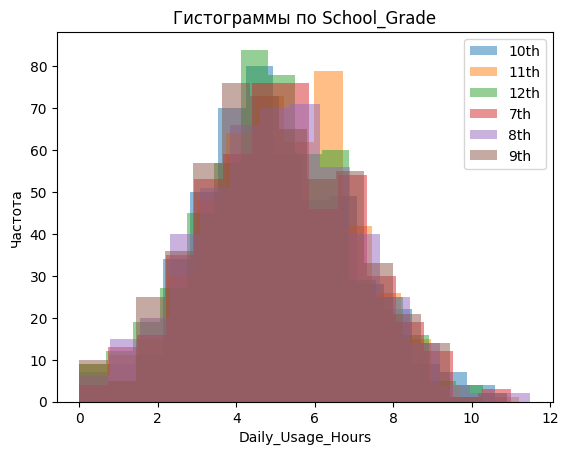

                  mean       var
School_Grade                    
10th          4.977618  3.812605
11th          5.061795  3.635211
12th          4.936862  3.735589
7th           5.077062  3.883344
8th           5.066390  4.009513
9th           5.012167  3.912652


In [54]:
for grade, group in df.groupby('School_Grade'):
    plt.hist(group[col].dropna(), bins=15, alpha=0.5, label=str(grade))
plt.legend()
plt.title('Гистограммы по School_Grade')
plt.xlabel(col)
plt.ylabel('Частота')
plt.show()

# Среднее и дисперсия по группам
group_stats = df.groupby('School_Grade')[col].agg(['mean', 'var'])
print(group_stats)

## V. Итоговый отчёт

### 1. Числовые характеристики и графики

Для исходных данных `Daily_Usage_Hours` были получены следующие числовые характеристики:

- **Среднее:** 5.021  
- **Дисперсия:** 3.828  
- **Мода:** 4.4  
- **Медиана:** 5.0  
- **Квантили (25%, 50%, 75%):** 3.7, 5.0, 6.4  
- **Эксцесс:** -0.121  
- **Асимметрия:** 0.016  
- **Интерквартильный размах:** 2.700  

Графики (гистограмма, эмпирическая функция, Q-Q plot) показали, что распределение близко к симметричному, с небольшой плосковатостью (отрицательный эксцесс). Мода и медиана близки к среднему, что говорит об отсутствии значительной асимметрии.

---

### 2. Являются ли данные нормальными

- **Хи-квадрат:** 13.870 (степеней свободы: 5)
- **Z-асимметрия:** 0.362  
- **Z-эксцесс:** -1.351  

**Вывод:**  
Показатели асимметрии и эксцесса близки к нулю, что говорит о близости распределения к нормальному. Значение хи-квадрат немного превышает критическое значение для уровня значимости 0.05, поэтому гипотеза о нормальности может быть формально отклонена, но отклонение незначительное.

---

### 3. Эффект обработки данных

#### Стандартизированные данные

- **Среднее:** ≈ 0  
- **Дисперсия:** 1  
- **Эксцесс:** -0.237  
- **Асимметрия:** -0.046  
- **Z-асимметрия:** -1.021  
- **Z-эксцесс:** -2.651  
- **Хи-квадрат:** 13.377  

**Вывод:**  
Стандартизация не меняет форму распределения, а приводит данные к нулевому среднему и единичной дисперсии. Характеристики асимметрии и эксцесса остались близки к нулю. Значения критериев немного улучшились, но хи-квадрат всё ещё чуть выше критического значения.

#### Логарифмированные данные

- **Среднее:** 5.001  
- **Дисперсия:** 3.726  
- **Эксцесс:** -0.237  
- **Асимметрия:** -0.046  
- **Z-асимметрия:** -1.021  
- **Z-эксцесс:** -2.651  
- **Хи-квадрат:** 13.377  

**Вывод:**  
Логарифмирование не привело к существенным изменениям в распределении: значения характеристик почти идентичны стандартизированным данным. Это говорит о том, что исходные данные уже были близки к нормальному распределению.

---

### 4. Различия распределений внутри разных групп `School_Grade`

| School_Grade | Среднее | Дисперсия |
|--------------|--------:|----------:|
| 10th         |   4.98  |    3.81   |
| 11th         |   5.06  |    3.64   |
| 12th         |   4.94  |    3.74   |
| 7th          |   5.08  |    3.88   |
| 8th          |   5.07  |    4.01   |
| 9th          |   5.01  |    3.91   |

**Вывод:**  
Средние значения и дисперсии ежедневного времени использования телефона практически не различаются между классами. Это свидетельствует о схожести поведения среди школьников разных возрастных групп.

---

## Общий вывод

- Исходные данные близки к нормальному распределению.
- Обработка данных (стандартизация, логарифмирование) не дала существенного эффекта, что подтверждается и графиками, и числовыми характеристиками.
- Распределения внутри групп `School_Grade` практически совпадают, существенных различий не обнаружено.
